In [1]:
import pandas as pd
import networkx as nx
import numpy as np
G = nx.Graph()
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [4]:
n_pairs = 1000

graph = pd.read_csv('all_distances/GraphTop{}.csv'.format(n_pairs),index_col=0)
graph[['Node1', 'Node2']] = np.sort(graph[['Node1', 'Node2']].values, axis=1)
graph = graph[graph['Node1'] != graph['Node2']]
graph['method_comb'] = graph['Node1'] + graph['Node2']

canberra = pd.read_csv('all_distances/CanberraDistance{}.csv'.format(n_pairs),index_col=0)
canberra[['Node1', 'Node2']] = np.sort(canberra[['Node1', 'Node2']].values, axis=1)
canberra = canberra[canberra['Node1'] != canberra['Node2']]
canberra['method_comb'] = canberra['Node1'] + canberra['Node2']

graph = graph[graph['method_comb'].isin(canberra['method_comb'])]

In [5]:
graph[['Node1_color', 'Node2_color']] = 0
canberra[['Node1_color', 'Node2_color']] = 0

In [6]:
colors_dict = {'_unfiltered_uncorrected': 'c',
               '_filtered_uncorrected': 'y',
               '_unfiltered_corrected': 'b',
               '_filtered_corrected': 'r'}

types_dict = {'_unfiltered_uncorrected': 't1',
               '_filtered_uncorrected': 't2',
               '_unfiltered_corrected': 't3',
               '_filtered_corrected': 't4'}


In [7]:
graph['Node1_color'] = ('_' + graph['Node1'].str.split('_', 1, expand=True)[1]).replace(colors_dict)

graph['Node2_color'] = ('_' + graph['Node2'].str.split('_', 1, expand=True)[1]).replace(colors_dict)

node_colors = {}
for node in graph['Node1']:
    node_colors[node] = graph[graph['Node1'] == node]['Node1_color'].unique()[0]
    
for node in graph['Node2']:
    if node not in node_colors.keys():
        node_colors[node] = graph[graph['Node2'] == node]['Node2_color'].unique()[0]

In [8]:
canberra['Node1_color'] = ('_' + canberra['Node1'].str.split('_', 1, expand=True)[1]).replace(colors_dict)

canberra['Node2_color'] = ('_' + canberra['Node2'].str.split('_', 1, expand=True)[1]).replace(colors_dict)

node_colors = {}
for node in canberra['Node1']:
    node_colors[node] = canberra[canberra['Node1'] == node]['Node1_color'].unique()[0]
    
for node in canberra['Node2']:
    if node not in node_colors.keys():
        node_colors[node] = canberra[canberra['Node2'] == node]['Node2_color'].unique()[0]

## edge defined by concordance

In [9]:
G = nx.Graph()
G = nx.from_pandas_edgelist(graph, 'Node1', 'Node2')

In [10]:
colors_G = []
for node in G.nodes():
    colors_G.append(node_colors[node])
    
weights_G = []
for edge in G.edges():
    edge = sorted(edge)
    weight_G = graph[(graph['Node1'] == edge[0]) & (graph['Node2'] == edge[1])]['Strength'].values[0]
    weights_G.append(weight_G)

sc  = MinMaxScaler()
#weights = np.log(weights)   
weights_G = np.array(weights_G).reshape(-1, 1)
weights_G = sc.fit_transform(weights_G)
weights_G = weights_G * 5

labels_G = {}
for node in G.nodes():
    labels_G[node] = node.split('_')[0]

In [11]:
for k, edge in enumerate(G.edges()):
    edge = sorted(edge)
    G[edge[0]][edge[1]]['weight'] = weights_G[k]/5

In [12]:
pos = nx.circular_layout(G)

In [25]:
legend_elements = [plt.Line2D([0], [0], marker='o', color='c', label='Unfiltered uncorrected',
                          markerfacecolor='c', markersize=30),
                   plt.Line2D([0], [0], marker='o', color='y', label='Filtered uncorrected',
                          markerfacecolor='y', markersize=30),
                  plt.Line2D([0], [0], marker='o', color='b', label='Unfiltered corrected',
                          markerfacecolor='b', markersize=30),
                  plt.Line2D([0], [0], marker='o', color='r', label='Filtered corrected',
                          markerfacecolor='r', markersize=30)]

In [26]:
colors_dict = {'_unfiltered_uncorrected': 'c',
               '_filtered_uncorrected': 'y',
               '_unfiltered_corrected': 'b',
               '_filtered_corrected': 'r'}

C:\Users\percy\AppData\Local\Temp/ipykernel_19772/3837046651.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


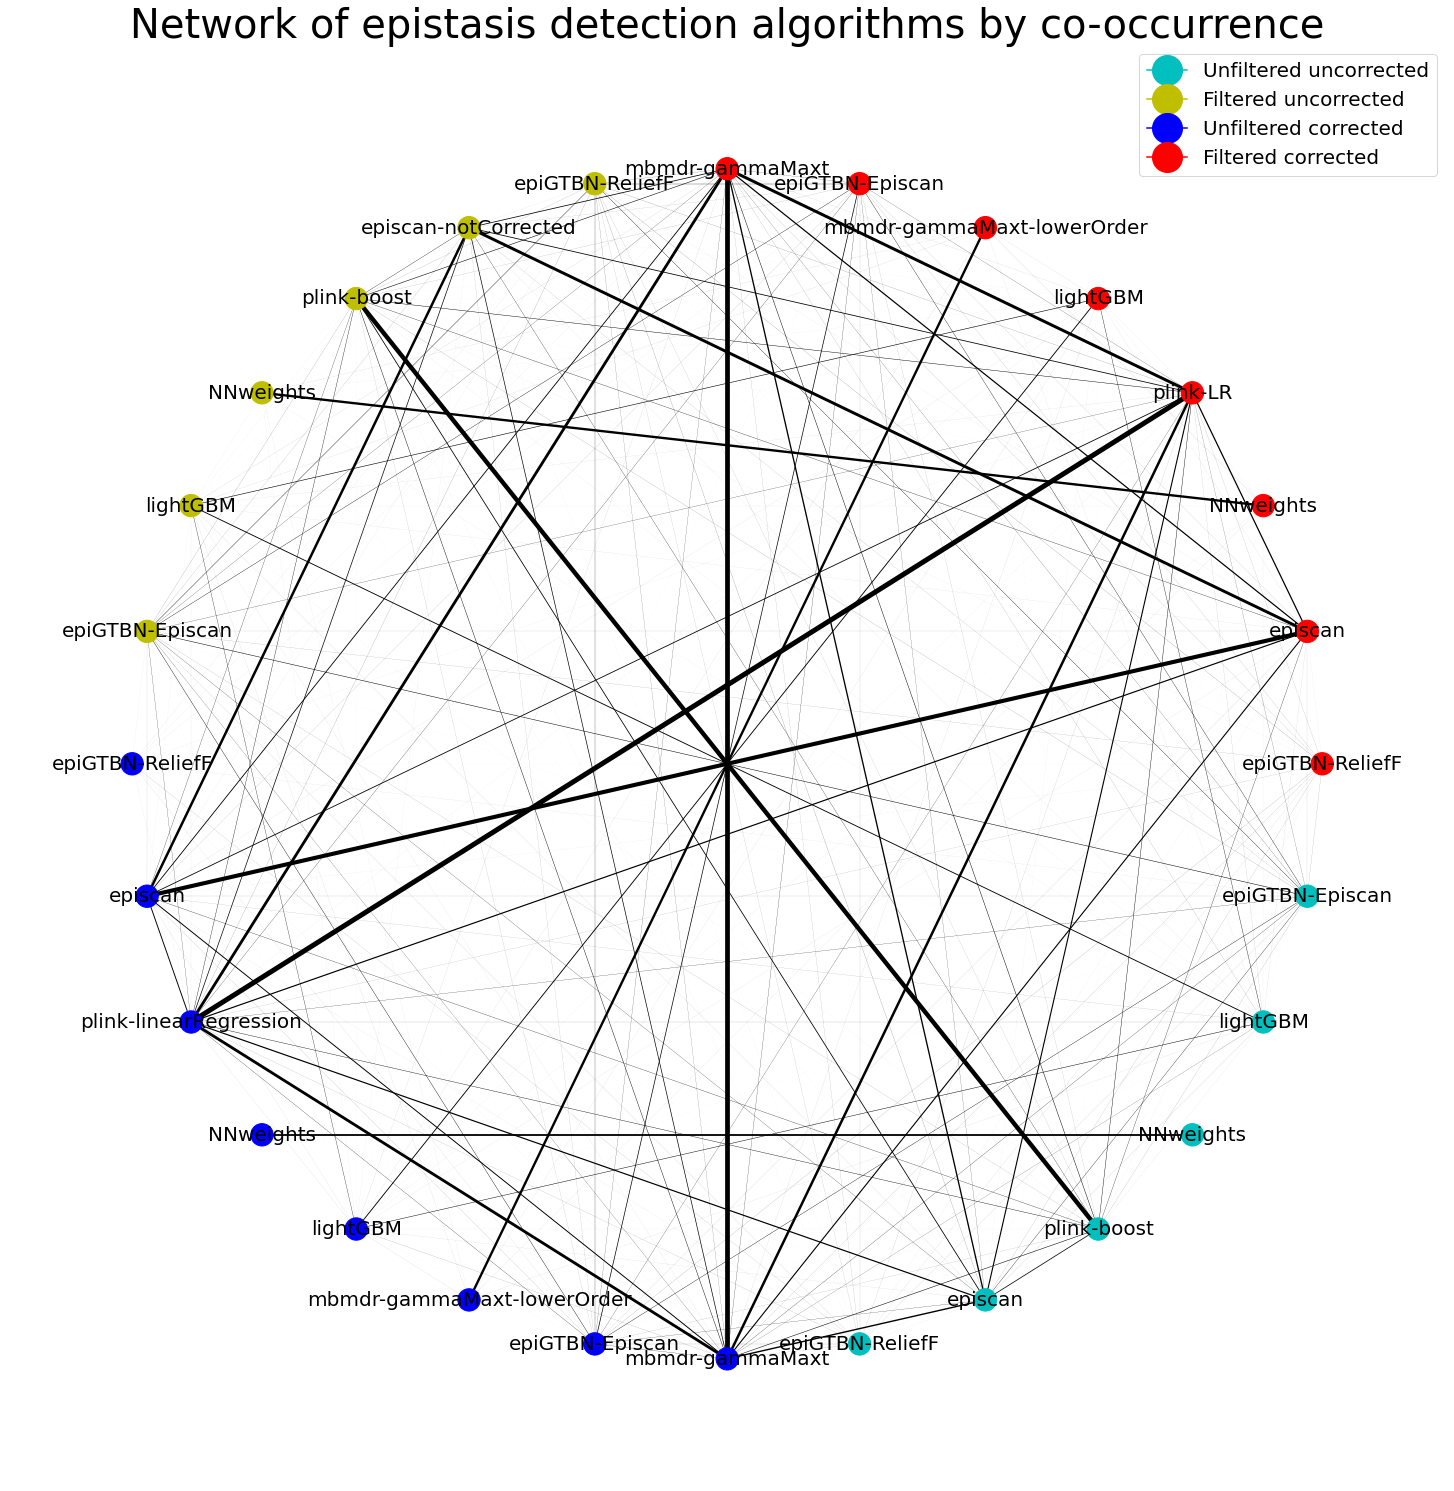

In [34]:
plt.figure(figsize=(20, 20))
sc = nx.draw(G, pos=pos, node_color =colors_G, with_labels=True, 
                      width=weights_G.flatten(), font_size=20, 
                      node_size=500, labels=labels_G)
plt.legend(handles=legend_elements, fontsize=20)
plt.title('Network of epistasis detection algorithms by co-occurrence', fontsize=40)
plt.tight_layout()
plt.show()

## edge defined by Canberra distance

In [14]:
C = nx.Graph()
C = nx.from_pandas_edgelist(canberra, 'Node1', 'Node2')

colors_C = []
for node in C.nodes():
    colors_C.append(node_colors[node])
    
weights_C = []
for edge in C.edges():
    edge = sorted(edge)
    weight_C = canberra[(canberra['Node1'] == edge[0]) & (canberra['Node2'] == edge[1])]['Strength'].values[0]
    weights_C.append(weight_C)

sc  = MinMaxScaler()
#weights = np.log(weights)   
weights_C = np.array(weights_C).reshape(-1, 1)
weights_C = sc.fit_transform(weights_C)
weights_C = weights_C

labels_C = {}
for node in C.nodes():
    labels_C[node] = node.split('_')[0]

In [15]:
for k, edge in enumerate(C.edges()):
    edge = sorted(edge)
    C[edge[0]][edge[1]]['weight'] = weights_C[k]

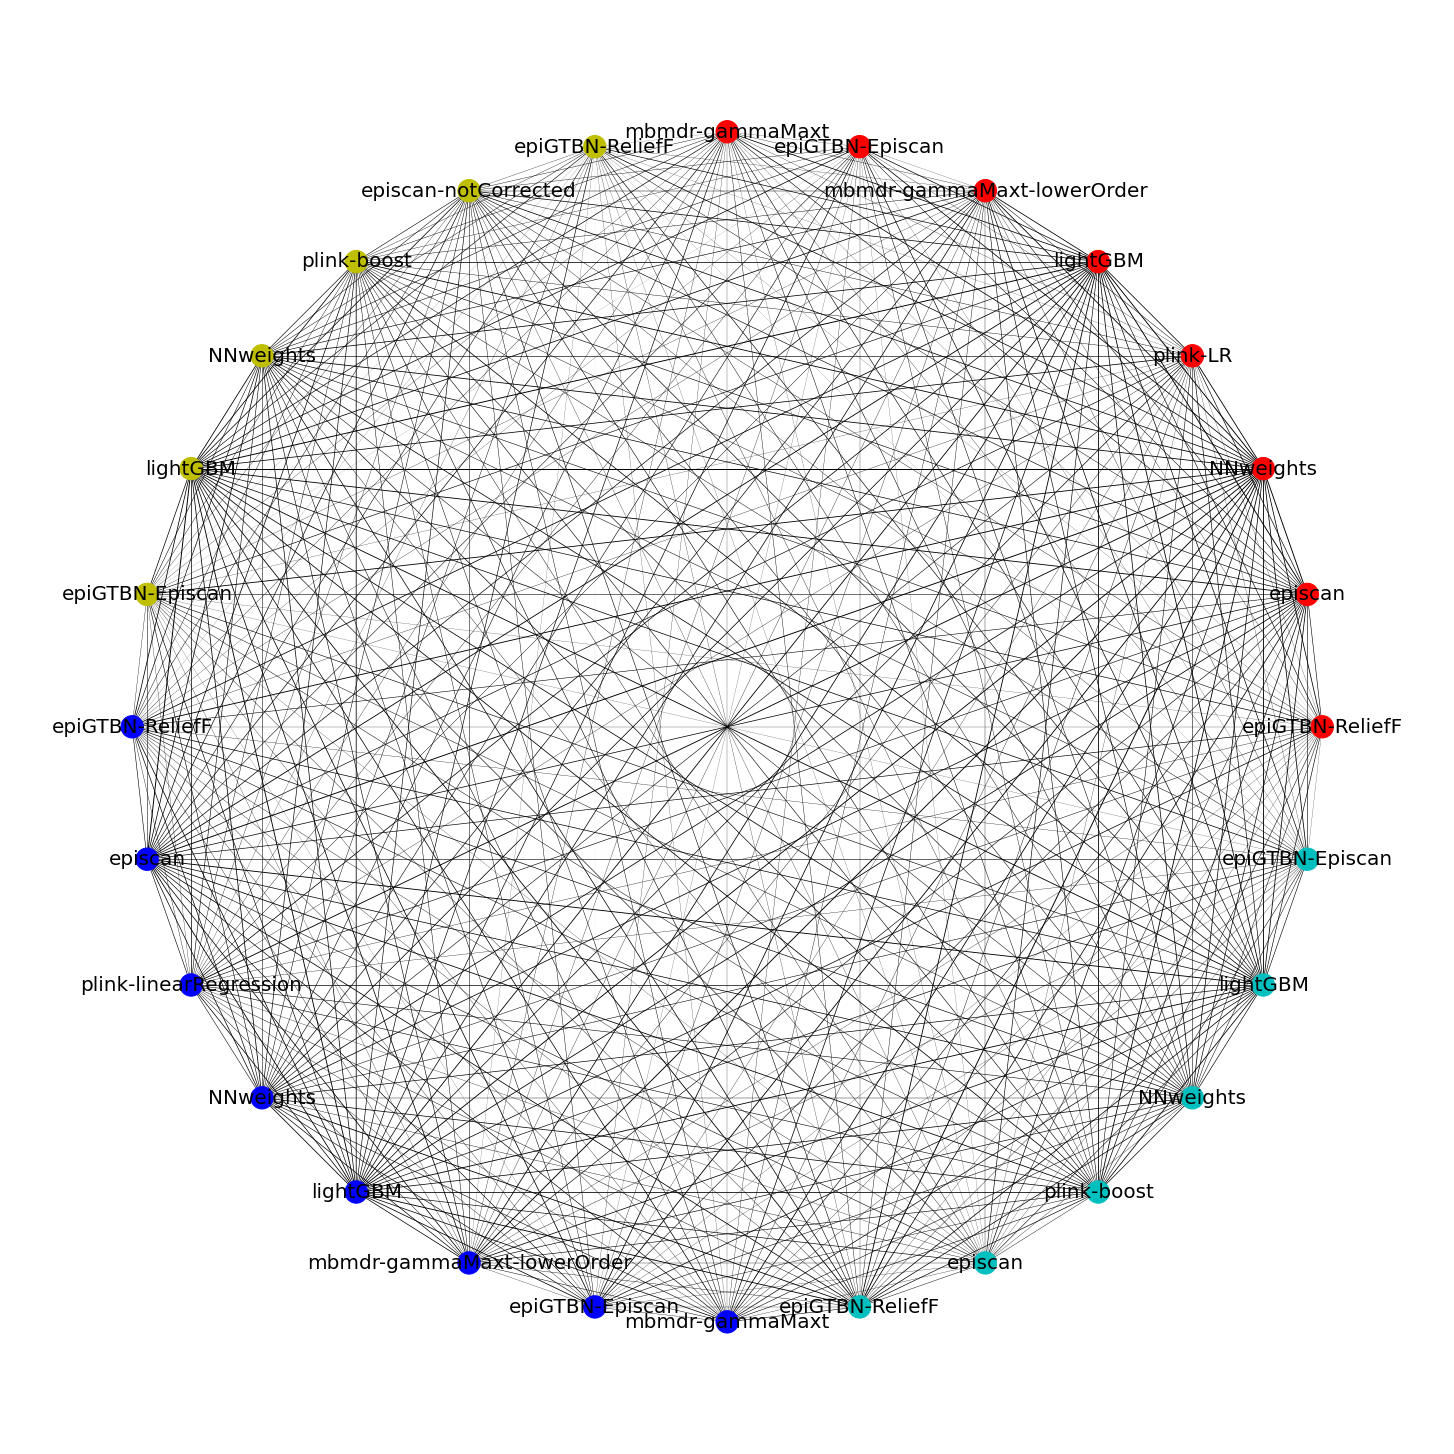

In [16]:
plt.figure(figsize=(20, 20))
sc = nx.draw(C, pos=pos, node_color =colors_C, 
                      width=weights_C.flatten(), font_size=20, 
                      node_size=500, labels=labels_C)
plt.show()

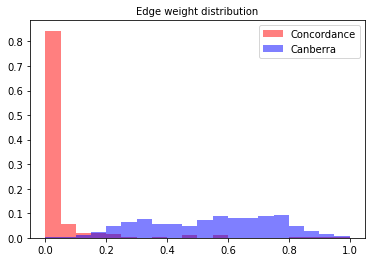

In [17]:
plt.figure(figsize=(6,4))
plt.hist(weights_G/5, 20,color='r', label='Concordance',alpha=0.5, weights=np.ones(len(weights_G))/len(weights_G))
plt.hist(weights_C, 20,color='b', label='Canberra',alpha=0.5, weights=np.ones(len(weights_C))/len(weights_C))
plt.legend()
plt.title('Edge weight distribution', fontsize=10)
plt.show()

## network clustering

In [ ]:
from sknetwork.hierarchy import Paris
from IPython.display import SVG
from sknetwork.visualization import svg_dendrogram

In [ ]:
adj_G = nx.to_numpy_array(G)
adj_C = nx.to_numpy_array(C)

In [ ]:
paris = Paris()
dendrogram_G = paris.fit_transform(adj_G)
dendrogram_G = svg_dendrogram(dendrogram_G)
SVG(dendrogram_G)


In [ ]:
nx.to_numpy_array(G)